<a href="https://colab.research.google.com/github/suleymanVR/MachineLearning/blob/main/Week7_svm%26nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [297]:
data = pd.read_csv("data.csv")

In [298]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

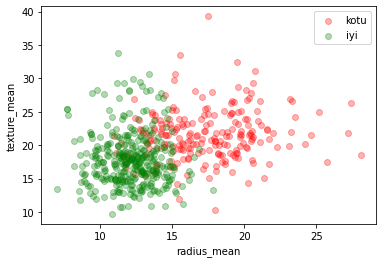

In [299]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()


In [300]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)


In [301]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [302]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# **Support Vector Machine**

In [325]:
from sklearn.svm import SVC

In [326]:
list_accuracy = []
for i in range(1,100):
  svm = SVC(C=i, random_state = 1)
  svm.fit(x_train,y_train)
  list_accuracy.append(svm.score(x_test,y_test))

In [327]:
len(list_accuracy)

99

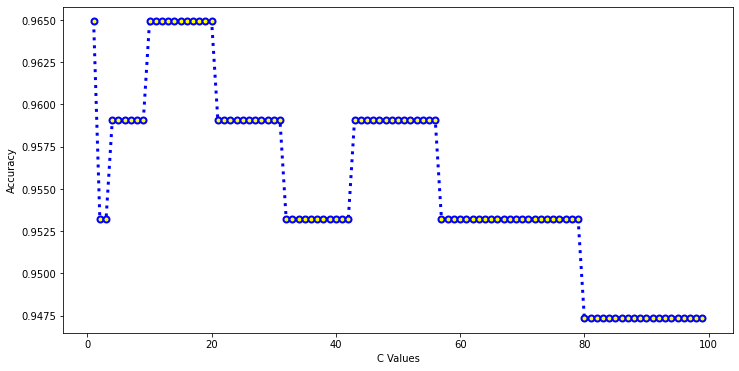

In [328]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100), list_accuracy,
         color="blue",
         linewidth=3,
         linestyle=":",
         marker="o",
         markerfacecolor="yellow",
         markeredgewidth=2, 
         markeredgecolor="blue")
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.show()

In [329]:
list_accuracy2 = []
for i in range(1,101):
  svm = SVC(C=i, random_state = 1)
  svm.fit(x_train,y_train)
  list_accuracy2.append(svm.score(x_test,y_test))
  print(i,list_accuracy2.pop())

1 0.9649122807017544
2 0.9532163742690059
3 0.9532163742690059
4 0.9590643274853801
5 0.9590643274853801
6 0.9590643274853801
7 0.9590643274853801
8 0.9590643274853801
9 0.9590643274853801
10 0.9649122807017544
11 0.9649122807017544
12 0.9649122807017544
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544
20 0.9649122807017544
21 0.9590643274853801
22 0.9590643274853801
23 0.9590643274853801
24 0.9590643274853801
25 0.9590643274853801
26 0.9590643274853801
27 0.9590643274853801
28 0.9590643274853801
29 0.9590643274853801
30 0.9590643274853801
31 0.9590643274853801
32 0.9532163742690059
33 0.9532163742690059
34 0.9532163742690059
35 0.9532163742690059
36 0.9532163742690059
37 0.9532163742690059
38 0.9532163742690059
39 0.9532163742690059
40 0.9532163742690059
41 0.9532163742690059
42 0.9532163742690059
43 0.9590643274853801
44 0.9590643274853801
45 0.9590643274853801
46 0.95906432748538

# **Navie Bayes [Gauss]**

In [308]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [309]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [310]:
print("navie bayes gaussian accuracy: ",nb.score(x_test,y_test))

navie bayes gaussian accuracy:  0.935672514619883


# **Navie Bayes [Bernoulli]**

In [311]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [312]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [313]:
print("navie bayes bernoulli accuracy : ",nb.score(x_test,y_test))

navie bayes bernoulli accuracy :  0.6374269005847953


# **Navie Bayes [Multinomial]**

In [314]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [315]:
y_pred =nb.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

In [316]:
print("navie bayes multinomial accuracy : ",nb.score(x_test,y_test))

navie bayes multinomial accuracy :  0.8304093567251462
